In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

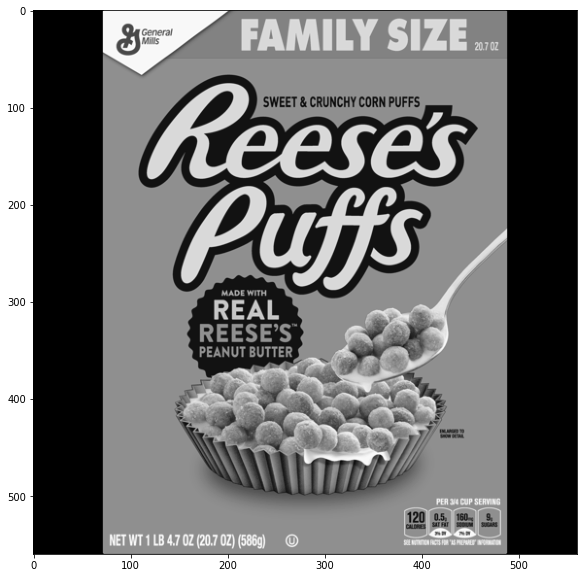

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0) # read as gray scale
display(reeses)

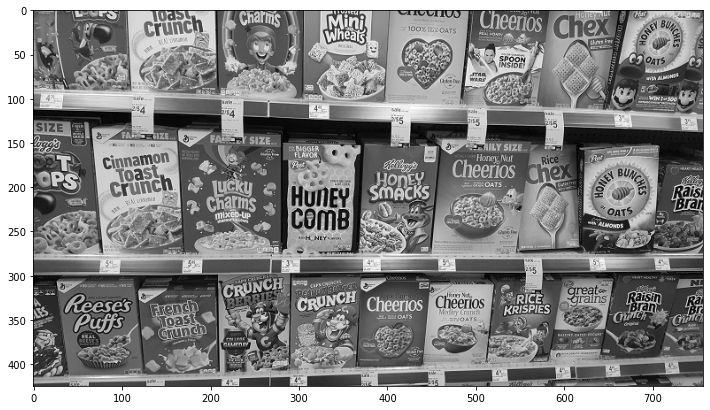

In [4]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

In [6]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [7]:
bf = cv2.BFMatcher()

In [8]:
matches = bf.knnMatch(des1, des2, k=2) # k=2 provides best matches as 1st and 2nd best match.

In [20]:
matches[:2] # if matches of 1st and 2nd columns' distances are close to each other, matches are good. 

((< cv2.DMatch 000002DC6FB28F70>, < cv2.DMatch 000002DC6FB28CB0>),
 (< cv2.DMatch 000002DC6FB517B0>, < cv2.DMatch 000002DC6FB51A50>))

In [21]:
good_matches = list()
# Ratio test
for match1, match2 in matches: 
    # if match1 dist less than 75% of match2 distance, it is a good match
    # less distance is a good match
    if match1.distance < match2.distance * 0.75:
        good_matches.append([match1]) # You should append a list object inside your list

In [22]:
print(len(matches))
print(len(good_matches))

1501
79


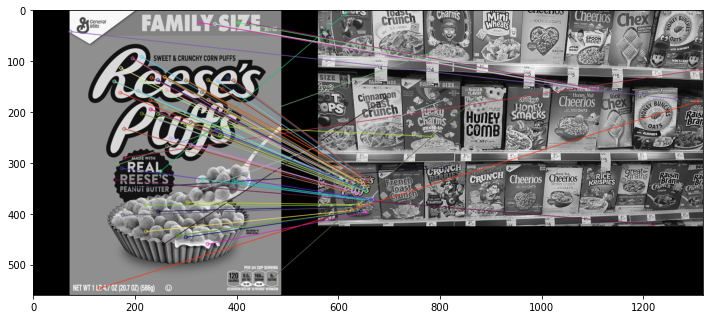

In [24]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good_matches, None, flags = 2)
display(sift_matches)